# _Ejercicio 4_
____

<img src="" width="1000" height="400">

A continuación se describe paso a paso la construcción de una tabla de frecuencias utilizando las librerías **_Pandas_** y **_numpy_**. El análisis visual de los datos corre a cuenta de las librerías **_matplotlib_** y **_seaborn_** para la representación de: gráfica de barras a partir del histograma, ojiva y polígono de frecuencias.

In [1]:
# Importación de las librerías:

import matplotlib.pyplot as plt
from scipy import stats
from collections import defaultdict
from bisect import bisect_left
import pandas as pd
import math
import numpy as np
import csv
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

### **Construcción de la tabla de fecuencias**

Los datos son previamente almacenados en una rchivo **.txt** sin ningún orden en especial o tipo de arreglo. Para este ejemplo, dicho archivo es llamado **data_ejercicio_4.txt**.

Necesitaremos la creación de dos objetos de tipo _listas_ para la visualización de los datos en el archivo **.txt**. Los llamaremos `listas` y `datos`. 

Después se lleva a cabo la iteración de cada uno de los datos en el archivo **.txt**, dentro de un _loop_, en el objeto `listas`. Posteriormente se crea un tercer objeto, de tipo arreglo, que nos permitirá llegar a la visualización de cada uno de los datos. Lo llamaremos `np_datos`.

In [2]:
# Carga de los datos mediante la lectura del archivo fuente.txt:

listas = []
datos=[]

with open('data_ejercicio_4.txt', newline='') as archivo:
    for linea in csv.reader(archivo):
        listas.append(linea)

# Adisión de cada uno de los datos al objeto arreglo:

for lista in listas:
    for elemento in lista:
        datos.append(float(elemento))
        np_datos=np.sort(np.array(datos))

print('los datos, ordenados, son los siguientes '+ str(np.sort(np_datos)), end=' ')

los datos, ordenados, son los siguientes [37. 37. 40. 43. 43. 47. 47. 47. 47. 48. 50. 50. 50. 51. 52. 53. 53. 53.
 54. 55. 55. 56. 57. 57. 57. 57. 57. 57. 58. 58. 59. 59. 59. 60. 60. 60.
 61. 61. 61. 61. 61. 62. 62. 63. 64. 65. 65. 66. 66. 66. 67. 69. 69. 70.
 71. 71. 76. 76. 77. 81. 81. 81. 82. 83.] 

#### _Agrupamiento (rango ($R$), amplitud ($A$)) e intervalos de clases ($k$) de los datos_

Todas las medidas de posición son calculadas utilizando el objeto `np_datos` y las correspondientes funciones de **_numpy_**. Además se provee del número del inferior de la primera clase (**35**) y el número de clases ($k$) igual a **5**:

In [3]:
# Número de datos
np_datos=np.array(datos)
print('El número total de datos(n) es: '+str(len(np_datos)))

# Máximos y Mínimos
print('El dato mayor es: '+np_datos.max().astype(str))
print('El dato menor es: '+np_datos.min().astype(str))

# Rango
rango=np_datos.max().astype(float)-35
print('El rango(R) es igual a '+ str(round(rango,2))+ ', si tomamos en cuenta que nos han proporcionado el límite inferior del intervalo de clases igual a 35.')

# Clases (5)
clases=np.histogram(np_datos, bins=5)
clases_a=(rango/5)
print('Utilizando un número de 5 clases (k) la amplitud (A) es igual a '+str(clases_a))

# # Clases (raíz cuadrada)
# sqrt=np.histogram(np_datos, bins='sqrt')
# sqrt_a=sqrt[1][1]-sqrt[1][0]
# print('Utilizando la raíz cuadrada, del número total de datos, tenemos un número de clases igual a :'+str(len(sqrt[0]))+
#       ' con una aplitud (A) igual a '+str(round(sqrt_a,3)))

El número total de datos(n) es: 64
El dato mayor es: 83.0
El dato menor es: 37.0
El rango(R) es igual a 48.0, si tomamos en cuenta que nos han proporcionado el límite inferior del intervalo de clases igual a 35.
Utilizando un número de 5 clases (k) la amplitud (A) es igual a 9.6


#### _Medidas de tendencia central; media, mediana y moda_

Posteriormente realizamos calculamos las medidas de tendencia central `media`, `mediana` y `moda` para los datos no agrupados. Todas las medidas de centralización son calculadas utilizando el objeto `np_datos` y las funciones pertinentes de **_numpy_**:

In [4]:
# media 
print('la media es igual a: '+ str(round(np.mean(np_datos),3)))

# mediana
print('la mediana es igual a: '+ str(round(np.median(np_datos),3)))

# moda
print('la moda es igual a: '+ str(stats.mode(np_datos)))

# media harmonica
print('la media armónica es igual a: '+str(round(stats.hmean(np_datos),3)))

# media geométrica
print('la media geométrica es igual a: '+str(round(stats.gmean(np_datos),3)))

# media cuadrática 
print('la media cuadrática  es igual a: '+str(round(np.sqrt(np.mean(np_datos)),3)))

la media es igual a: 59.703
la mediana es igual a: 59.0
la moda es igual a: ModeResult(mode=array([57.]), count=array([6]))
la media armónica es igual a: 57.7
la media geométrica es igual a: 58.711
la media cuadrática  es igual a: 7.727


Los intervalos de clase parten del un valor igual a **35** y son agrupados con ayuda de la creación de una función nombrada `lc`. Esta función tiene la tarea de recibir los parámetros `start`, `stop` y `step`.

In [5]:
# Creación de los intervalos
""""""

# La función "lc" recibe como parámetros dato menor, dato mayor y amplitud para agrupar los límites de clase:
def lc(start, stop, step):
    i=start
    while i <= stop:
        yield i
        i+=step
        yield i

# Ejecución de la función "lc" y alojamiento de los resultado en una variable llamda "l_inter"
l_inter=[]
for i in lc(35, np_datos.max(),round(clases_a,0)):
    l_inter.append(round(i,2))

# Construcción de una tupla para cada intervalo de clase, y creación de una lista de listas "t_iter" que aloja a cada uno de ellos.
t_iter=np.array([i for i in zip(l_inter[::2],l_inter[1::2])]).tolist()
t_iter

[[35.0, 45.0], [45.0, 55.0], [55.0, 65.0], [65.0, 75.0], [75.0, 85.0]]

#### _Medidas de agrupamiento: Marcas de Clase ($x_i$), Frecuencias absolutas ($n_i$), Frecuencias relativas ($f_i$), Frecuencias absolutas acumuladas ($N_i$) y Frecuencias relativas acumuladas ($F_i$)._

Las marcas de clase, `macl`, son calculadas con la función `mean()` sobre el objeto `t_iter` y redondeado a **1** decimales. Las frecuencias absolutas, `frec_abs`, son extraidas del objeto `sturges` que alojaba dos arreglos, uno para los límites de clase y otro sus frecuencias absolutas.

Para la frecuencia relativa, `frec_re`, el ćalculo lo realizamos convirtiendo en un arreglo la variable `frec_abs` y dividiendo cada uno de sus elementos entre el número total de datos. Mientras que la frecuencia absoluta acumulada. `frec_abs_ac` es calculada mediante el método `cumsum()` de _numpy_ sobre la variable `frec_abs`.

Por último; para la frecuencia relativa acumulada, `frec_re_ac`, es necesario convertir en un arreglo a la variable `frec_re`. Y, a cada elemento, hay que dividirlo entre el número total de datos.

Todos estos datos ahora podemos convertirlos en un _DataFrame_ de nombre **df_frec** para poderlos representar como una tabla de frecuencias.

In [6]:
# Cálculo de las marcas de clase "xi".
""""""

np_titer=np.array(t_iter)
macl=[round(np.mean(x),1) for x in np_titer]

# Frecuecias absolutas "ni".
""""""
def frecuencia(li, min, max):
    ctr = 0
    for x in li:
        if min <= x < max:
            ctr += 1
    return ctr
    
frec_abs=[]
for d in t_iter:
    frec_abs.append(frecuencia(datos, d[0], d[1]))

# Cálulo de la frecuencia relativa "fi".
""""""

np_frec=np.array(frec_abs)
frec_re=[(f/(len(np_datos))) for f in np_frec]


# Cálculo de la frecuencia absoluta acumulada "Ni".
""""""

frec_abs_ac=list(np.cumsum(frec_abs))


# Cálculo de la frecuencia relativa acumulada "Fi".
""""""

np_frec_ac=np.array(frec_abs_ac)
frec_re_ac=[(f/(len(np_datos))) for f in np_frec_ac]

df_frec=pd.DataFrame({'$ci$':t_iter,'$x_i$':macl, '$n_i$':frec_abs, '$f_i$':frec_re, '$N_i$':frec_abs_ac, '$F_i$':frec_re_ac})
df_frec

,$ci$,$x_i$,$n_i$,$f_i$,$N_i$,$F_i$
0,"[35.0, 45.0]",40.0,5,0.078125,5,0.078125
1,"[45.0, 55.0]",50.0,14,0.218750,19,0.296875
2,"[55.0, 65.0]",60.0,26,0.406250,45,0.703125
3,"[65.0, 75.0]",70.0,11,0.171875,56,0.875000
4,"[75.0, 85.0]",80.0,8,0.125000,64,1.000000


### **Reprecentación gráfica de los datos**

#### _Histograma, Pólígono de Frecuencias y Ojiva_

Todas las representaciones gráficas para los datos son obtenidas mediante la librería `matplotlib` y `seaborn` para dar estilo.

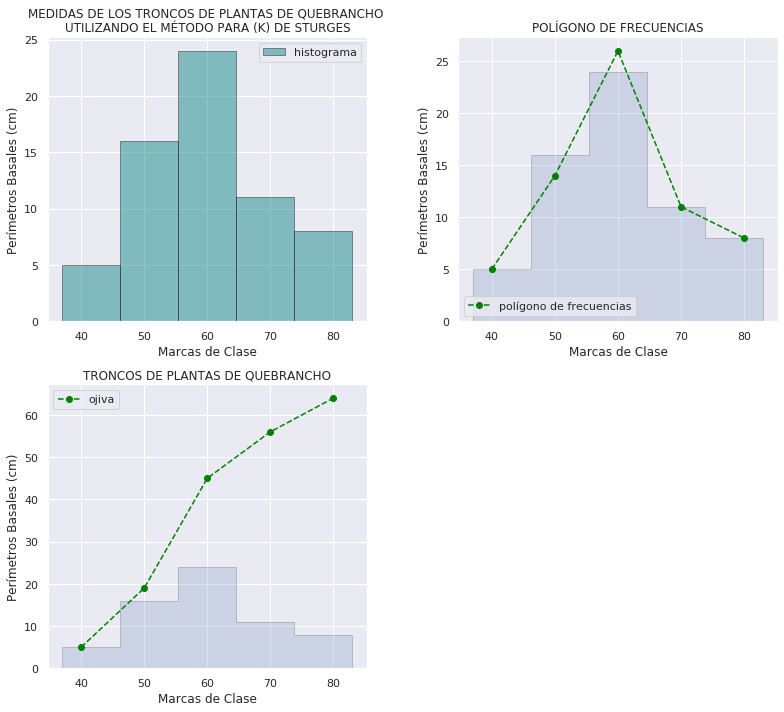

In [7]:
fig = plt.figure(figsize=(11,10))

# HISTOGRAMA:
""""""

ax1 = fig.add_subplot(221)

plt.hist(np_datos, bins=len(frec_abs), histtype='bar', edgecolor='k',alpha=.45, color='teal') 
plt.xticks(macl)
plt.ylabel('Perímetros Basales (cm)')
plt.xlabel('Marcas de Clase')
plt.title('MEDIDAS DE LOS TRONCOS DE PLANTAS DE QUEBRANCHO \n'+ 'UTILIZANDO EL MÉTODO PARA (K) DE STURGES')
plt.legend(['histograma']) 


# POLÍGONO DE FRECUENCIAS:
""""""

ax2 = fig.add_subplot(222)

plt.plot(macl,frec_abs, color='green', marker='o', linestyle='dashed', )
plt.xticks(macl)
plt.ylabel('Frecuencia')
plt.xlabel('Marcas de Clase')
plt.hist(np_datos, bins=len(frec_abs), histtype='stepfilled', edgecolor='k',alpha=0.2) 
plt.xticks(macl)
plt.ylabel('Perímetros Basales (cm)')
plt.xlabel('Marcas de Clase')
plt.title('POLÍGONO DE FRECUENCIAS')
plt.legend(['polígono de frecuencias']) 

ax3 = fig.add_subplot(223)

plt.plot(macl,frec_abs_ac, color='green', marker='o', linestyle='dashed', )
plt.xticks(macl)
plt.ylabel('Frecuencia')
plt.xlabel('Marcas de Clase')
plt.hist(np_datos, bins=len(frec_abs), histtype='stepfilled', edgecolor='k',alpha=0.2) 
plt.xticks(macl)
plt.ylabel('Perímetros Basales (cm)')
plt.xlabel('Marcas de Clase')
plt.title('TRONCOS DE PLANTAS DE QUEBRANCHO')
plt.legend(['ojiva']) 

fig.tight_layout()

### **Medidas de Dispersión**

Todos los cuartiles son calculados con ayuda de la libreía _Scipy Statistics (numpy)_, en el apartado de _Averages and variances_. Además de la varianza, desviasión estandar y el coeficiente de relación. 

Mientras que con ayuda de la librería _Scipy Statistics (scipy.stats)_, en el apartado de _Summary statistics_, pudimos obtener la qurtosis (**$m_4$**) y el coeficiente de variación.

El quartil Q1 (25%) :  53.0
El quartil Q2 (50%) :  59.0
El quartil Q3 (75%) :  66.0


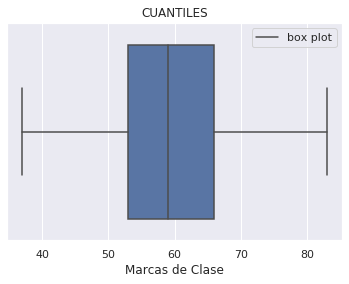

La varianza es igual a: 117.114990234375
La desviasión estandar es ingual a: 10.821967946467732
El coeficiente de relación (Pearson) es ingual a: 1.0
El coeficiente de variación es aigual a: 0.18126300669299525
La Curtosis es igual a: -0.19420395014639524


In [8]:
print("El quartil Q1 (25%) : ", np.quantile(np_datos, .25)) 
print("El quartil Q2 (50%) : ", np.quantile(np_datos, .50)) 
print("El quartil Q3 (75%) : ", np.quantile(np_datos, .75))

# QUANTILES:
""""""
q=sns.boxplot(np_datos)
plt.xticks(macl)
plt.title('CUANTILES')
plt.xlabel('Marcas de Clase')
plt.legend(['box plot']) 
plt.show()

# Cálculos usando el módulo Scipy Statistics (numpy) functions" en el apartado de Averages and variances:
""""""
print("La varianza es igual a: "+str(np.var(np_datos)))
print("La desviasión estandar es ingual a: "+str(np.std(np_datos)))
print("El coeficiente de relación (Pearson) es ingual a: "+str(np.corrcoef(np_datos)))


# Cálculos usando el módulo Scipy Statistics "(scipy.stats) functions" en el apartado de Summary statistics:
""""""
print("El coeficiente de variación es aigual a: "+str(stats.variation(np_datos)))
print("La Curtosis es igual a: "+str(stats.kurtosis(np_datos)))